# APPLICATION OF CLASSIFICATION MODELS IN THE PREDICTION OF LUNG CANCER
by **Bitoon, Gil Garreth**

*The leading cause of cancer-related deaths worldwide is lung cancer.*

*Lung cancer can affect people who have never smoked, but smokers are at a higher risk than nonsmokers. The quantity and frequency of cigarettes you've smoked are related to your risk of developing lung cancer. Even after years of smoking, you can significantly lower your risk of developing lung cancer by quitting.*

**The effectiveness of cancer prediction systems enables people to determine their cancer risk at a low cost and aids them in making the right decisions based on that knowledge. The information is gathered from the online lung cancer prediction system website.**

<this dataset was obtained in https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer?datasetId=2206522&sortBy=voteCount>

In [1]:
#import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

%matplotlib inline

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('survey_lung_cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
print('Missing data in training set:')
display(df.isnull().sum())

Missing data in training set:


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Preprocessing Data

In [6]:
cols = df.columns.tolist()
print(cols)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


### There are column names with unnecessary spaces. Formatting is also not uniform
we try to clean our dataset by turning string/boolean values into numerical data. 

In [7]:
from sklearn.preprocessing import LabelEncoder

cols = [i.strip().lower().replace(' ', '_') for i in cols]
df.columns = cols

cols.remove('age')
for i in cols:
    df[i] = LabelEncoder().fit_transform(df[i])

In [8]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


### For 'gender', Male = 1 and Female = 0
### Elsewhere, True = 1 and False = 0

In [9]:
df.describe()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


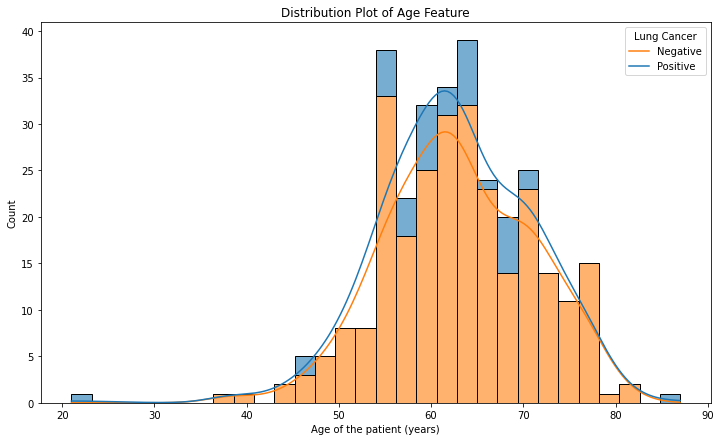

In [10]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='age', hue='lung_cancer', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.title('Distribution Plot of Age Feature')
plt.xlabel('Age of the patient (years)')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', loc='best', labels=['Negative', 'Positive'])
pass

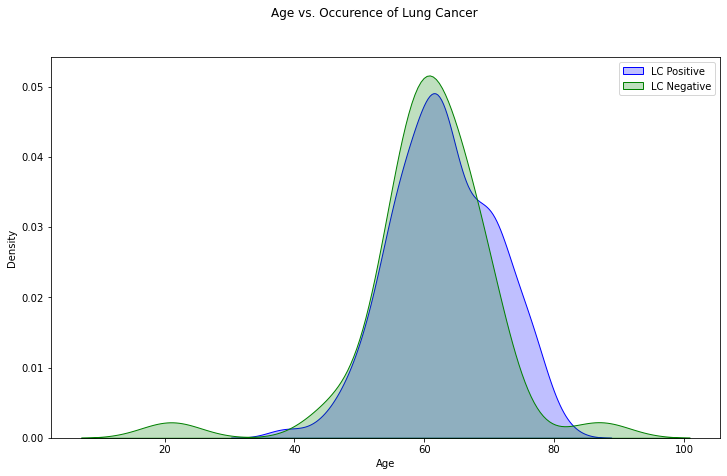

In [11]:
fig, ax = plt.subplots(figsize = (12, 7))

sns.kdeplot(df[df["lung_cancer"]==1]["age"], fill=True, color="blue", label="LC Positive", ax=ax)
sns.kdeplot(df[df["lung_cancer"]==0]["age"], fill=True, color="green", label="LC Negative", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")
plt.legend(loc = 'best')

fig.suptitle("Age vs. Occurence of Lung Cancer");

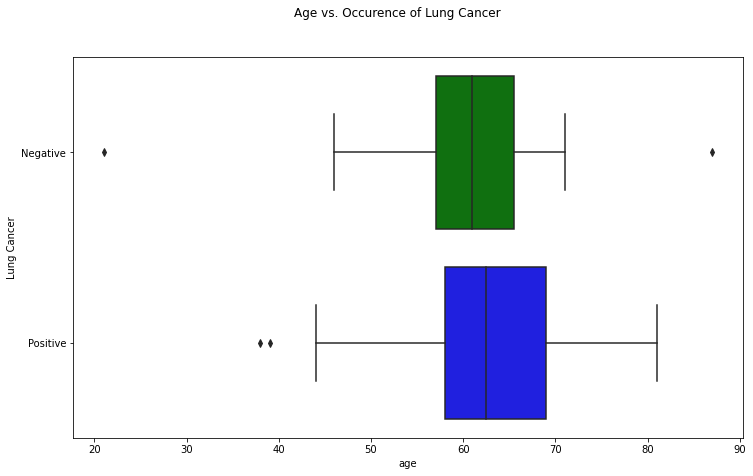

In [12]:
fig, ax = plt.subplots(figsize = (12, 7))

sns.boxplot(x="age", y="lung_cancer", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax, labels='c')

ax.set_ylabel("Lung Cancer")
ax.set_yticklabels(['Negative','Positive'])
fig.suptitle("Age vs. Occurence of Lung Cancer")
pass

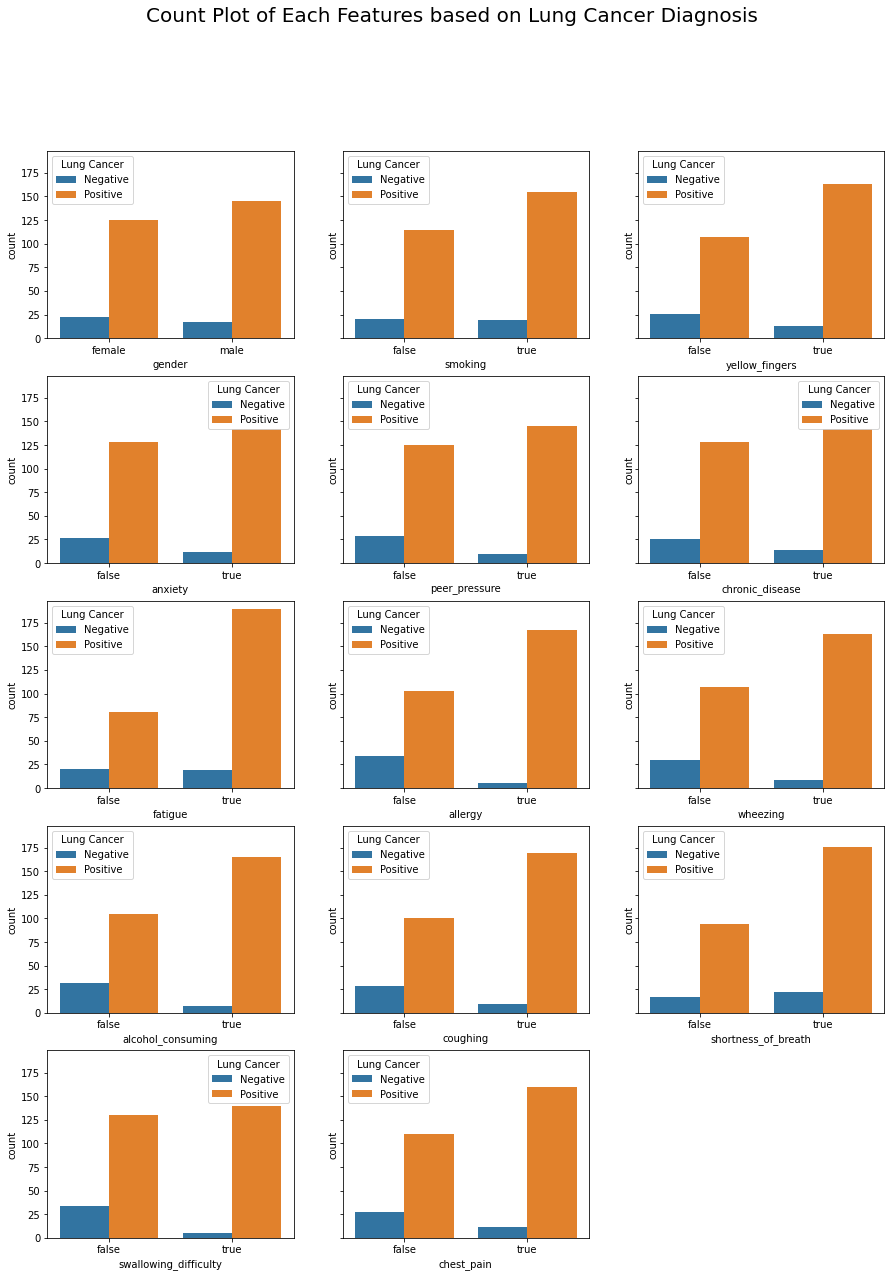

In [13]:
fig, axes = plt.subplots(5,3, sharey=True, figsize = (15,20))
fig.suptitle('Count Plot of Each Features based on Lung Cancer Diagnosis', fontsize = 20)

for feature, ax in zip(cols[:-1], axes.ravel()):
    
    sns.countplot(data=df, x=feature, hue='lung_cancer', ax = ax)
    ax.legend(title='Lung Cancer', loc='best', labels=['Negative', 'Positive'])
    
    if feature == 'gender':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['female','male'])
    else:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['false','true'])
    
fig.delaxes(axes[-1,-1])

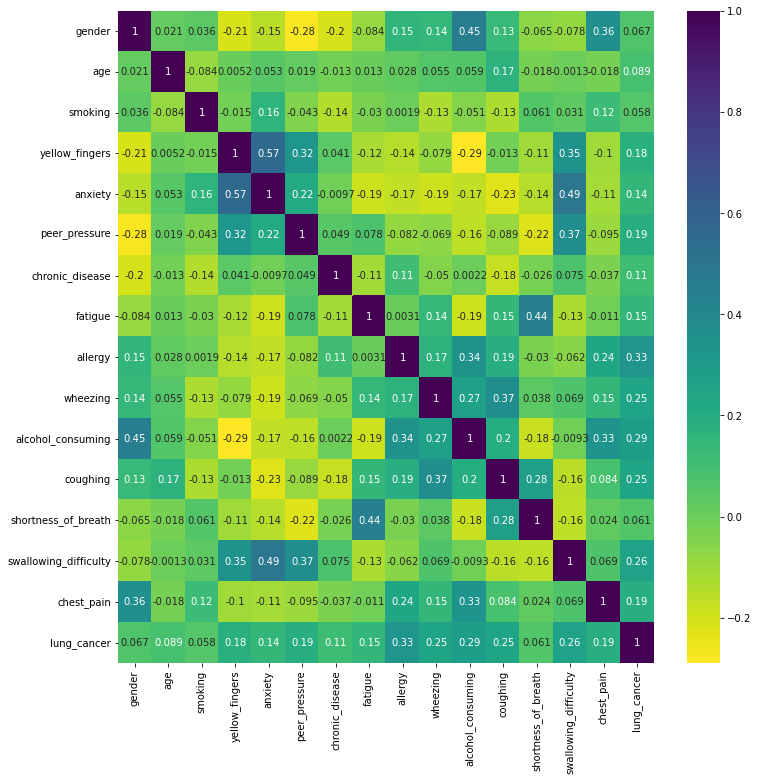

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='viridis_r', annot=True)
plt.show()

In [15]:
cols.remove('lung_cancer')
cols

['gender',
 'smoking',
 'yellow_fingers',
 'anxiety',
 'peer_pressure',
 'chronic_disease',
 'fatigue',
 'allergy',
 'wheezing',
 'alcohol_consuming',
 'coughing',
 'shortness_of_breath',
 'swallowing_difficulty',
 'chest_pain']

# Creating and Applying Classification Models

In [16]:
X = df[cols].values
y = df['lung_cancer'].values

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

train_all = pd.DataFrame()
test_all = pd.DataFrame()

for seedN in range(1,100,1):

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 50) # max_depth settings from 1 to 50

    for depth in maxdepth_settings:   
        tree = DecisionTreeClassifier(max_depth=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    train_all[seedN] = training_accuracy
    test_all[seedN] = test_accuracy

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)
tree = DecisionTreeClassifier(max_depth = 6, random_state=1)

tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.961039
accuracy on test set: 0.846154


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = tree.predict(X_test)

print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
print('Classification Report:\n{}'.format(classification_report(y_test, y_pred)))

Confusion Matrix:
[[ 7  3]
 [ 9 59]]


Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.70      0.54        10
           1       0.95      0.87      0.91        68

    accuracy                           0.85        78
   macro avg       0.69      0.78      0.72        78
weighted avg       0.89      0.85      0.86        78



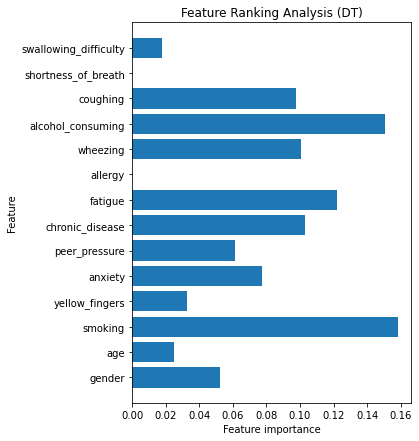

In [20]:
plt.figure(figsize=(5,7))
plt.title('Feature Ranking Analysis (DT)')

def plot_feature_importances(model):
    n_features = len(cols)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_importances(tree)

In [39]:
from sklearn.ensemble import RandomForestClassifier

train_all = []
test_all = []

maxdepth_settings = range(1, 50) # try max_depth

for depth in maxdepth_settings:   
    
    forest = RandomForestClassifier(max_depth=depth)  # build the model
    forest.fit(X_train, y_train)

    train_all.append(forest.score(X_train, y_train)) # record training set accuracy
    test_all.append(forest.score(X_test, y_test))   # record generalization accuracy 

<IPython.core.display.Javascript object>


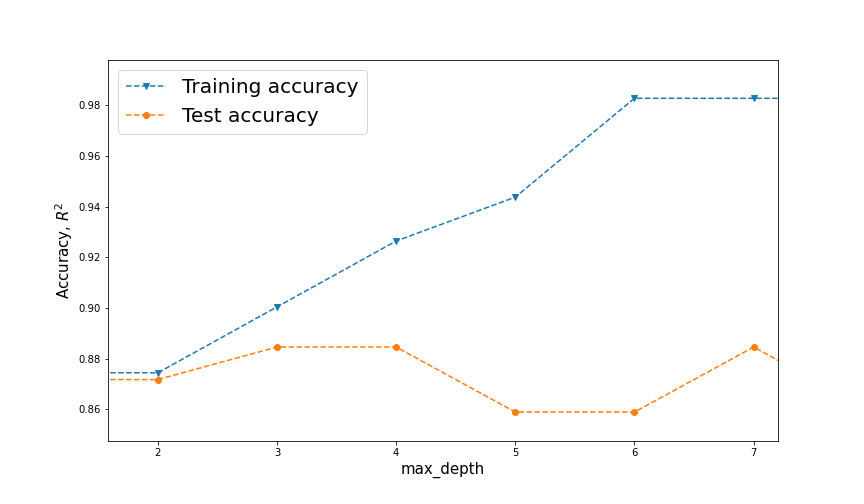

In [54]:
plt.figure(figsize = (12, 7))
#plt.xscale('log')
plt.plot(maxdepth_settings[:20], train_all[:20], '--v', label = "Training accuracy")
plt.plot(maxdepth_settings[:20], test_all[:20], '--o', label = "Test accuracy")
plt.ylabel("Accuracy, $R^2$", fontsize = 15)
plt.xlabel("max_depth",  fontsize = 15)
plt.legend(loc = 'best', prop = {'size': 20})
plt.show()
#%matplotlib notebook

## max_depth = 3 

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=3, random_state=0)
forest.fit(X_train, y_train)

print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.900433
accuracy on test set: 0.884615


In [56]:
y_pred = forest.predict(X_test)

print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
print('Classification Report:\n{}'.format(classification_report(y_test, y_pred)))

Confusion Matrix:
[[ 3  7]
 [ 2 66]]


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.90      0.97      0.94        68

    accuracy                           0.88        78
   macro avg       0.75      0.64      0.67        78
weighted avg       0.87      0.88      0.87        78



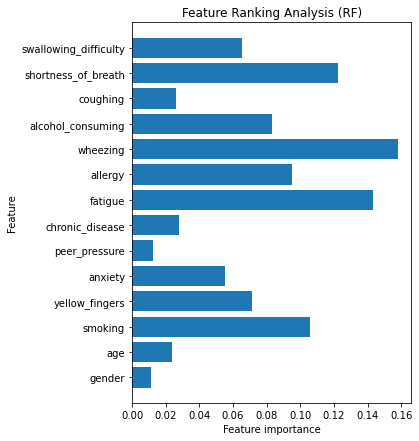

In [58]:
%matplotlib inline

plt.figure(figsize=(5,7))
plt.title('Feature Ranking Analysis (RF)')

plot_feature_importances(forest)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

train_all = []
test_all = []

maxdepth_settings = range(1, 50) # try max_depth

for depth in maxdepth_settings:   
    
    gbrt = GradientBoostingClassifier(max_depth=depth)  # build the model
    gbrt.fit(X_train, y_train)

    train_all.append(gbrt.score(X_train, y_train)) # record training set accuracy
    test_all.append(gbrt.score(X_test, y_test))   # record generalization accuracy 

<IPython.core.display.Javascript object>


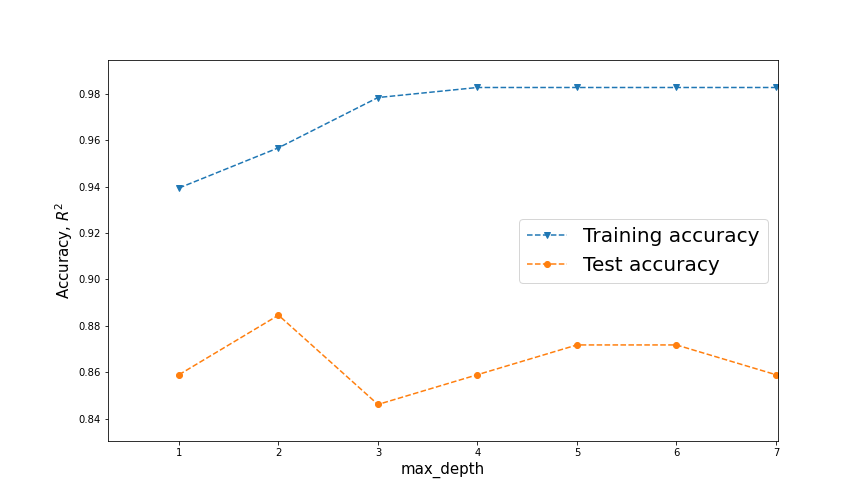

In [63]:
plt.figure(figsize = (12, 7))
plt.plot(maxdepth_settings, train_all, '--v', label = "Training accuracy")
plt.plot(maxdepth_settings, test_all, '--o', label = "Test accuracy")
plt.ylabel("Accuracy, $R^2$", fontsize = 15)
plt.xlabel("max_depth",  fontsize = 15)
plt.legend(loc = 'best', prop = {'size': 20})
plt.show()
#%matplotlib notebook

## max_depth = 2

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

train_all = []
test_all = []

alpha_settings = [0.05, 0.1, 0.2, 0.3]

for alpha in alpha_settings:   
    
    gbrt = GradientBoostingClassifier(learning_rate=alpha, max_depth = 2)  # build the model
    gbrt.fit(X_train, y_train)

    train_all.append(gbrt.score(X_train, y_train)) # record training set accuracy
    test_all.append(gbrt.score(X_test, y_test))   # record generalization accuracy 

<IPython.core.display.Javascript object>


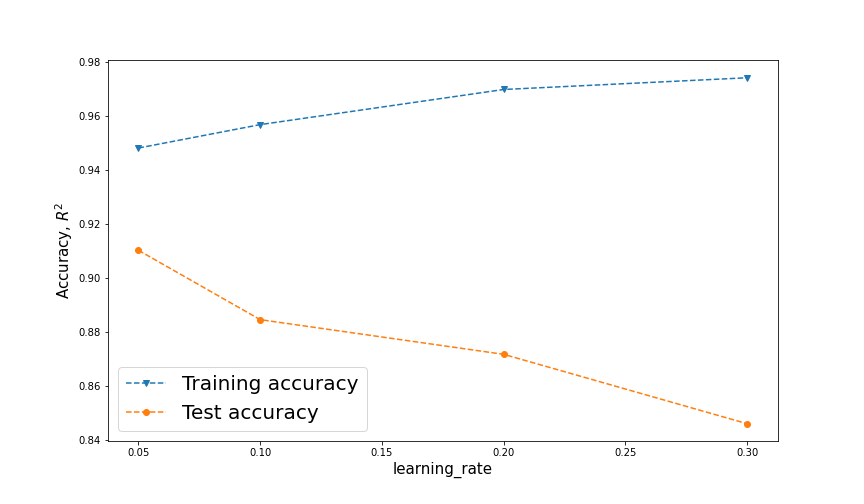

In [102]:
plt.figure(figsize = (12, 7))

plt.plot(alpha_settings, train_all, '--v', label = "Training accuracy")
plt.plot(alpha_settings, test_all, '--o', label = "Test accuracy")
plt.ylabel("Accuracy, $R^2$", fontsize = 15)
plt.xlabel("learning_rate",  fontsize = 15)
plt.legend(loc = 'best', prop = {'size': 20})
plt.show()
#%matplotlib notebook

## learning_rate = 0.05

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=2, max_depth = 2, learning_rate = 0.05)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.948052
accuracy on test set: 0.910256


In [104]:
y_pred = gbrt.predict(X_test)

print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
print('Classification Report:\n{}'.format(classification_report(y_test, y_pred)))

Confusion Matrix:
[[ 6  4]
 [ 3 65]]


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.94      0.96      0.95        68

    accuracy                           0.91        78
   macro avg       0.80      0.78      0.79        78
weighted avg       0.91      0.91      0.91        78



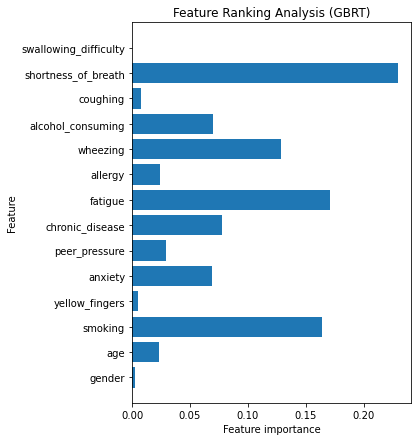

In [107]:
%matplotlib inline
plt.figure(figsize=(5,7))
plt.title('Feature Ranking Analysis (GBRT)')
plot_feature_importances(gbrt)

<IPython.core.display.Javascript object>


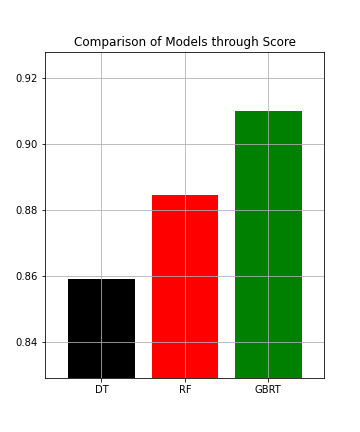

In [106]:
all_model_score = [tree.score(X_test, y_test), forest.score(X_test, y_test), gbrt.score(X_test, y_test)]
models = ['DT', 'RF', 'GBRT']
%matplotlib notebook

plt.figure(figsize = (5, 6))
plt.grid()
plt.yticks(np.arange(0, 1.0, 0.02))
plt.title('Comparison of Models through Score')
plt.bar(models, all_model_score, color=['black', 'red', 'green'])
pass

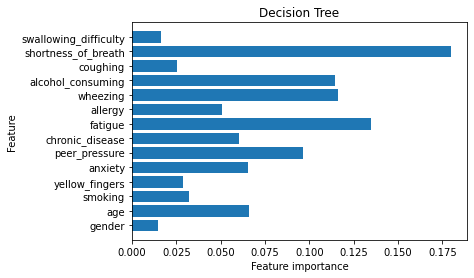

In [118]:
plt.title('Decision Tree')
plot_feature_importances(tree)

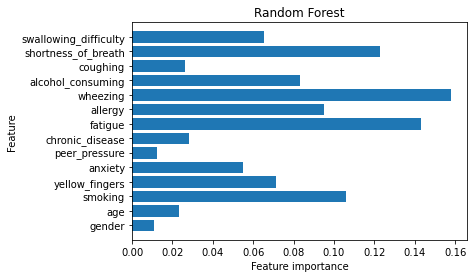

In [119]:
plt.title('Random Forest')
plot_feature_importances(forest)

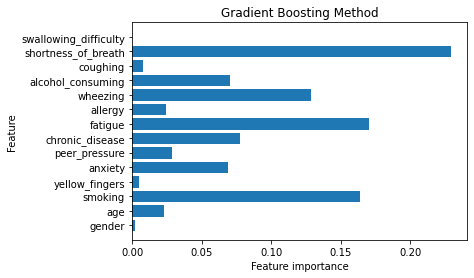

In [120]:
plt.title('Gradient Boosting Method')
plot_feature_importances(gbrt)